In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# interactive in notebook
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import pylab

### other module
from util_tsne import *

Automatically created module for IPython interactive environment


### training kernels

In [2]:
training_kernels = [[0.523255814,0.898519,1.273404,0.3188,0.3990453679,0.3990453679,0,0.6156719307,1,2.158354],
[0.5882352941,0.897425,1.434779,0.3589,0.3983864151,0.3983864151,0.6146552798,0.6146552798,2,2.505722],
[0.5462184873,0.891426,1.329263,0.3227,0.389767283,0.389767283,2.40545012,0.3006719453,4,1.8795],
[0.4621848739,0.899354,1.155747,0.2893,0.3871490377,0.3871490377,0.5973111637,0.5973111637,2,1.809195],
[0.4035874439,0.848605,0.338919,0.0847,0.1366144811,1.092986113,0,0,0,0.387801]]

training_kernels = np.array(training_kernels)

print training_kernels.shape

(5, 10)


### best block size for trainig kernels

In [3]:
# training kernel: best block size 
y = [512, 
     512,
     64,
     128,
     64]

y_name = [
"tranCoarseGrained", 
"tranNoBankConflicts",
"tranCoalesced",
"tranFineGrained",
"tranNaive"   
]


# y = np.array(y)
# print y.shape

### test 3d on kernel data

In [4]:
em_gammaobs = [[0.4484304933,0.296949,0.374258,0.1001,0.05629230189,0.05629230189,0,0,0,0.623941]]

em_gammaobs = np.array(em_gammaobs)
#print em_gammaobs.shape

X = training_kernels
X = np.append(X, em_gammaobs, axis=0)

print X.shape

(6, 10)


In [5]:
#X

### tsne-3d

In [6]:
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne3d.fit_transform(X)

In [7]:
X_tsne

array([[ -442.19736232,   123.34121826,    -1.41674537],
       [  602.43898599,   727.08273536,    27.42697693],
       [ -135.39480313,    63.74329777,    -1.81951286],
       [ -264.7294131 , -1021.52219337,   -17.28187373],
       [  101.68220794,    14.20364416,  -212.56456064],
       [  138.17573725,    93.07309347,   205.70780087]])

In [8]:
print tsne3d.kl_divergence_
#tsne.get_params

-4.36466789246


In [9]:
top3rows, top3bs = predit_bs_tsne(X_tsne, y)

input X dims : 6 x 3
row 0 : dist=616.968128624
row 1 : dist=805.786970807
row 2 : dist=344.628297482
row 3 : dist=1205.97662025
row 4 : dist=427.204794123
Top 3 distance : 344.628297482 , 427.204794123 ,616.968128624
Top 3 rows : 2 , 4 ,0
Top 3 ranking : 64 , 64 ,512


### visualize data

<IPython.core.display.Javascript object>


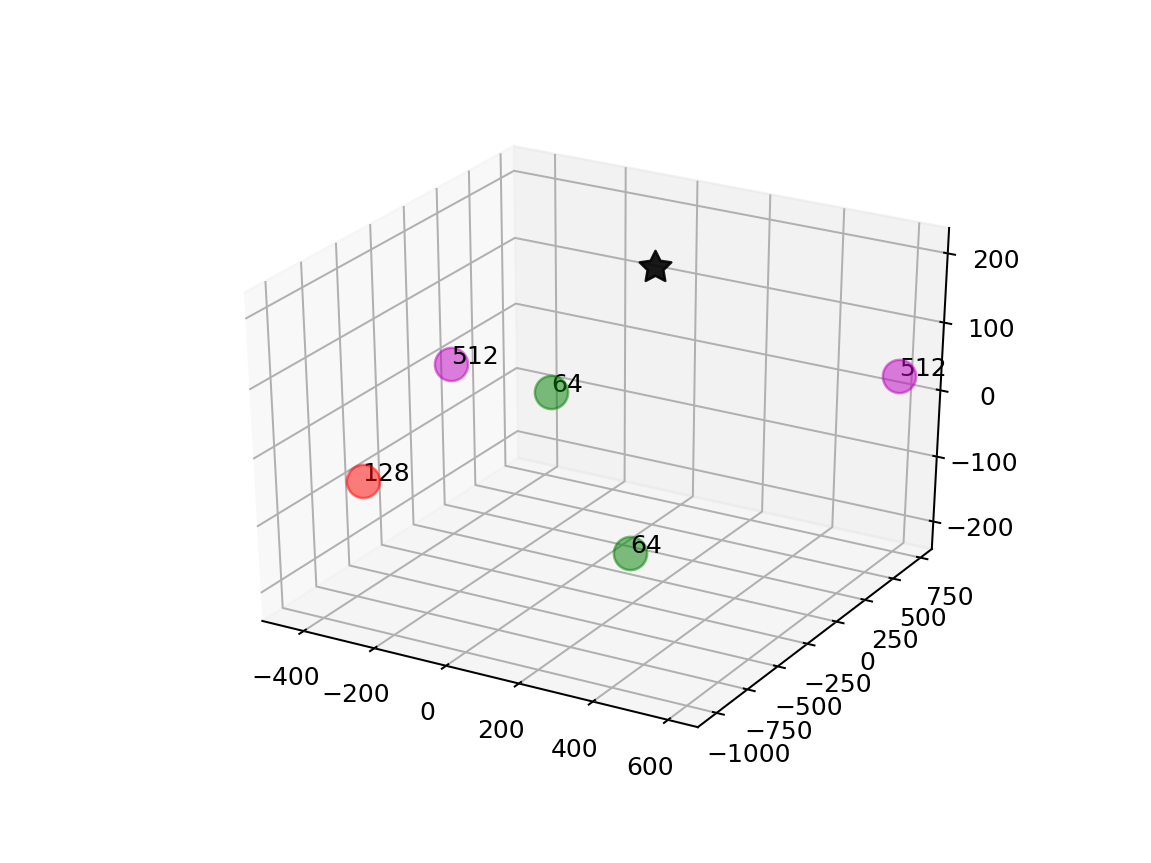

In [10]:
plot_tsne_3d(X_tsne, y)


### tsne-2d

In [11]:
tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne_2d = tsne2d.fit_transform(X)

print X_tsne_2d
print X_tsne_2d.shape

[[-154.56087253  -71.94823915]
 [  51.36929576   93.97242543]
 [-193.89914408  168.1555094 ]
 [ -71.91577553 -301.3968973 ]
 [ 131.58170544 -132.99535055]
 [ 232.52479651  237.43196989]]
(6, 2)


In [12]:
top3rows, top3bs = predit_bs_tsne(X_tsne_2d, y)

input X dims : 6 x 2
row 0 : dist=495.531461086
row 1 : dist=231.079978251
row 2 : dist=432.014588979
row 3 : dist=618.886588988
row 4 : dist=383.934769677
Top 3 distance : 231.079978251 , 383.934769677 ,432.014588979
Top 3 rows : 1 , 4 ,2
Top 3 ranking : 512 , 64 ,64


<IPython.core.display.Javascript object>


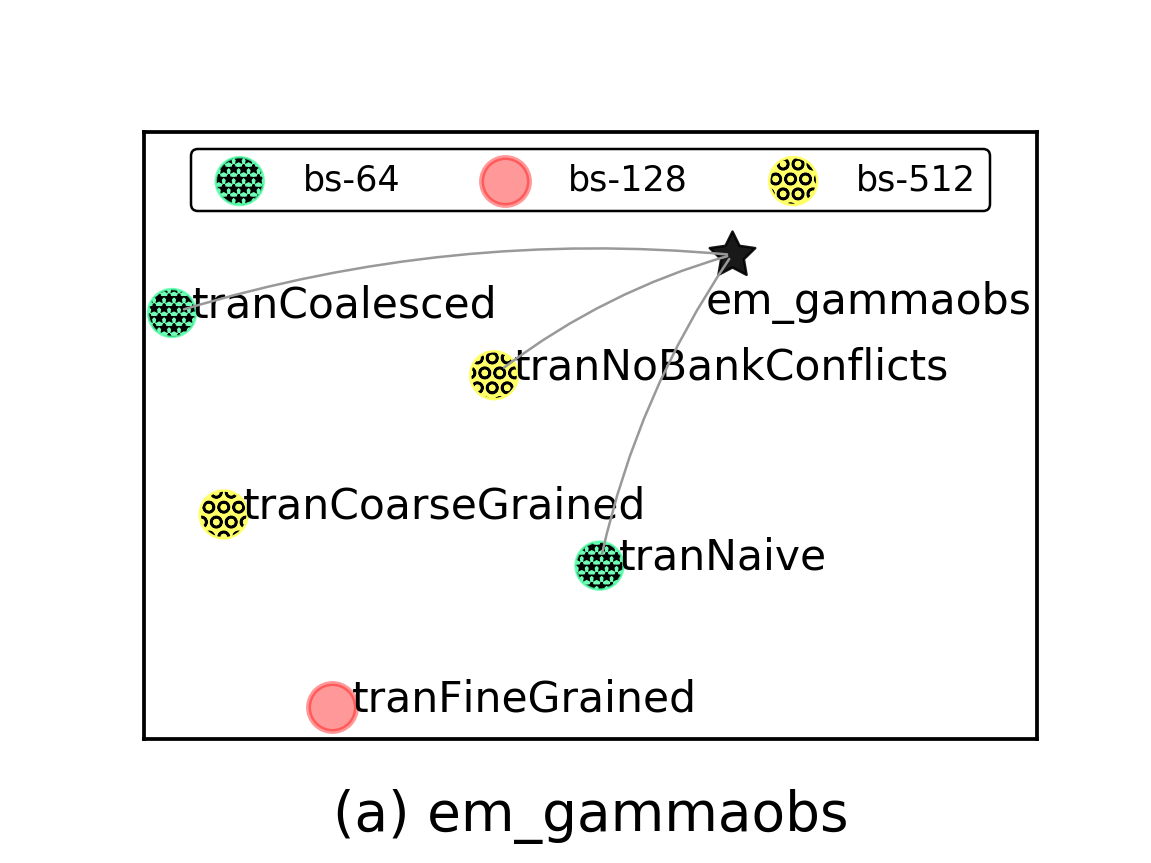

-215.222076806 253.865302539
-339.419989905 264.92824023


/Users/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/Users/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [13]:
#plot_tsne_2d(X_tsne_2d, y, top3rows)

#plot_tsne_2d_v1(X_tsne_2d, y, y_name, top3rows)

plot_tsne_2d_v2(X_tsne_2d, y, y_name, top3rows, figname='tsne_hmm_gammaobs', kernelname='em_gammaobs', 
                xtitle='(a) em_gammaobs')
